In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set(rc={'figure.figsize':(11.7,8.27)})
import pickle

In [2]:
data=pd.read_csv('heart.csv')
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
print(data.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [6]:
print(data.shape)

(303, 14)


In [7]:
print(data.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [5]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [45]:
cor=data.corr()
cor

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

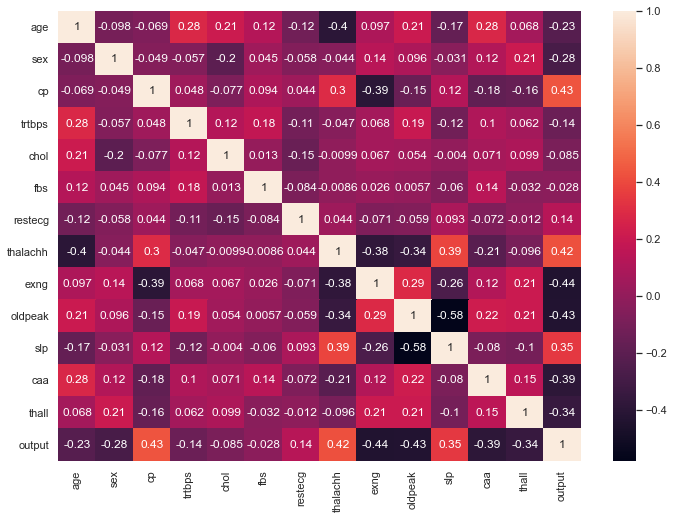

In [48]:
sns.heatmap(cor,annot=True)

In [9]:
y=data['output']

In [49]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [50]:
X=data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']]

In [51]:
calc_vif(X)

,variables,VIF
0,age,39.241186
1,sex,3.682952
2,cp,2.615083
3,trtbps,58.629045
4,chol,26.276396
5,fbs,1.268219
6,restecg,2.081059
7,thalachh,47.459548
8,exng,2.060408
9,oldpeak,3.120906


In [115]:
X=data[['age','sex', 'cp', 'fbs', 'restecg','exng', 'oldpeak', 'slp', 'caa']]

In [116]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64


In [117]:
print(X)

     age  sex  cp  fbs  restecg  exng  oldpeak  slp  caa
0     63    1   3    1        0     0      2.3    0    0
1     37    1   2    0        1     0      3.5    0    0
2     41    0   1    0        0     0      1.4    2    0
3     56    1   1    0        1     0      0.8    2    0
4     57    0   0    0        1     1      0.6    2    0
..   ...  ...  ..  ...      ...   ...      ...  ...  ...
298   57    0   0    0        1     1      0.2    1    0
299   45    1   3    0        1     0      1.2    1    0
300   68    1   0    1        1     0      3.4    1    2
301   57    1   0    0        1     1      1.2    1    1
302   57    0   1    0        0     0      0.0    1    1

[303 rows x 9 columns]


In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [119]:
lr=LogisticRegression(random_state=0,max_iter=1000)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(accuracy_score(y_test,pred))

0.8021978021978022


In [120]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pre=dt.predict(X_test)
print(accuracy_score(y_test,pre))

0.7362637362637363


In [121]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
prediction=rf.predict(X_test)
print(accuracy_score(y_test,prediction))

0.8351648351648352


In [122]:
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(X_train,y_train)
predictions=abc.predict(X_test)
print(accuracy_score(y_test,predictions))

0.7802197802197802


In [124]:
Pkl_Filename = "hd.pkl"  
pickle.dump(rf, open(Pkl_Filename, 'wb'))

In [125]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

In [126]:
Ypredict = Pickled_LR_Model.predict([[63,1,3,1,0,0,2.3,0,0]])  
Ypredict

array([1], dtype=int64)